Last updated on Mon Feb 20 18:31:09 2023


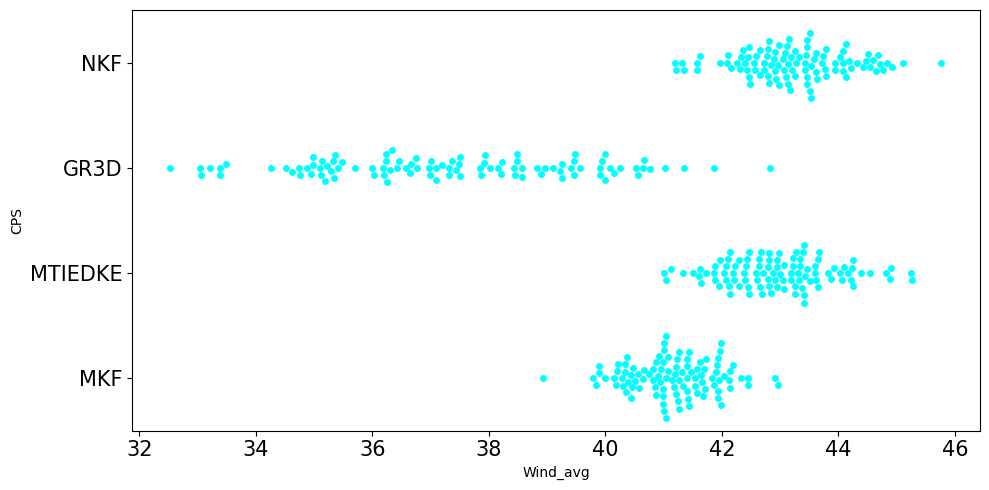

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))
plt.rcParams['figure.figsize'] = (10, 5)


def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) for _ in range(n_boots) ]


#pollution = pd.read_csv('./dataset/pollution_wide.csv')
pollution = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/Swarmplot_4.csv',keep_default_na=True, delimiter=',')
#, header=None,names=['Wind_KF','Pressure_KF'])
'''
cinci_may_NO2 = pollution.query("CPS  ==  'IBTrACS'").Wind

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2);

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False);
'''

pollution_may = pollution.query("Month == 3")
pollution_may

city_boots = pd.DataFrame()

for CPS in ['NKF', 'GR3D', 'MTIEDKE', 'MKF']: #'IBTrACS', 
    # Filter to city
    city_NO2 = pollution_may[pollution_may.CPS  ==  CPS].Wind*0.51444 #Knots to m/s
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'Wind_avg': bootstrap(city_NO2, 100), 'CPS': CPS})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "CPS", x = "Wind_avg", data = city_boots, color = 'cyan');

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


# Set final fig resources and then save figure.
#fig.set_size_inches(13, 13)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.3)
plt.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_Wind_Swarmplot.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)
plt.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_Wind_Swarmplot.pdf',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)


Last updated on Fri Feb 24 12:11:25 2023


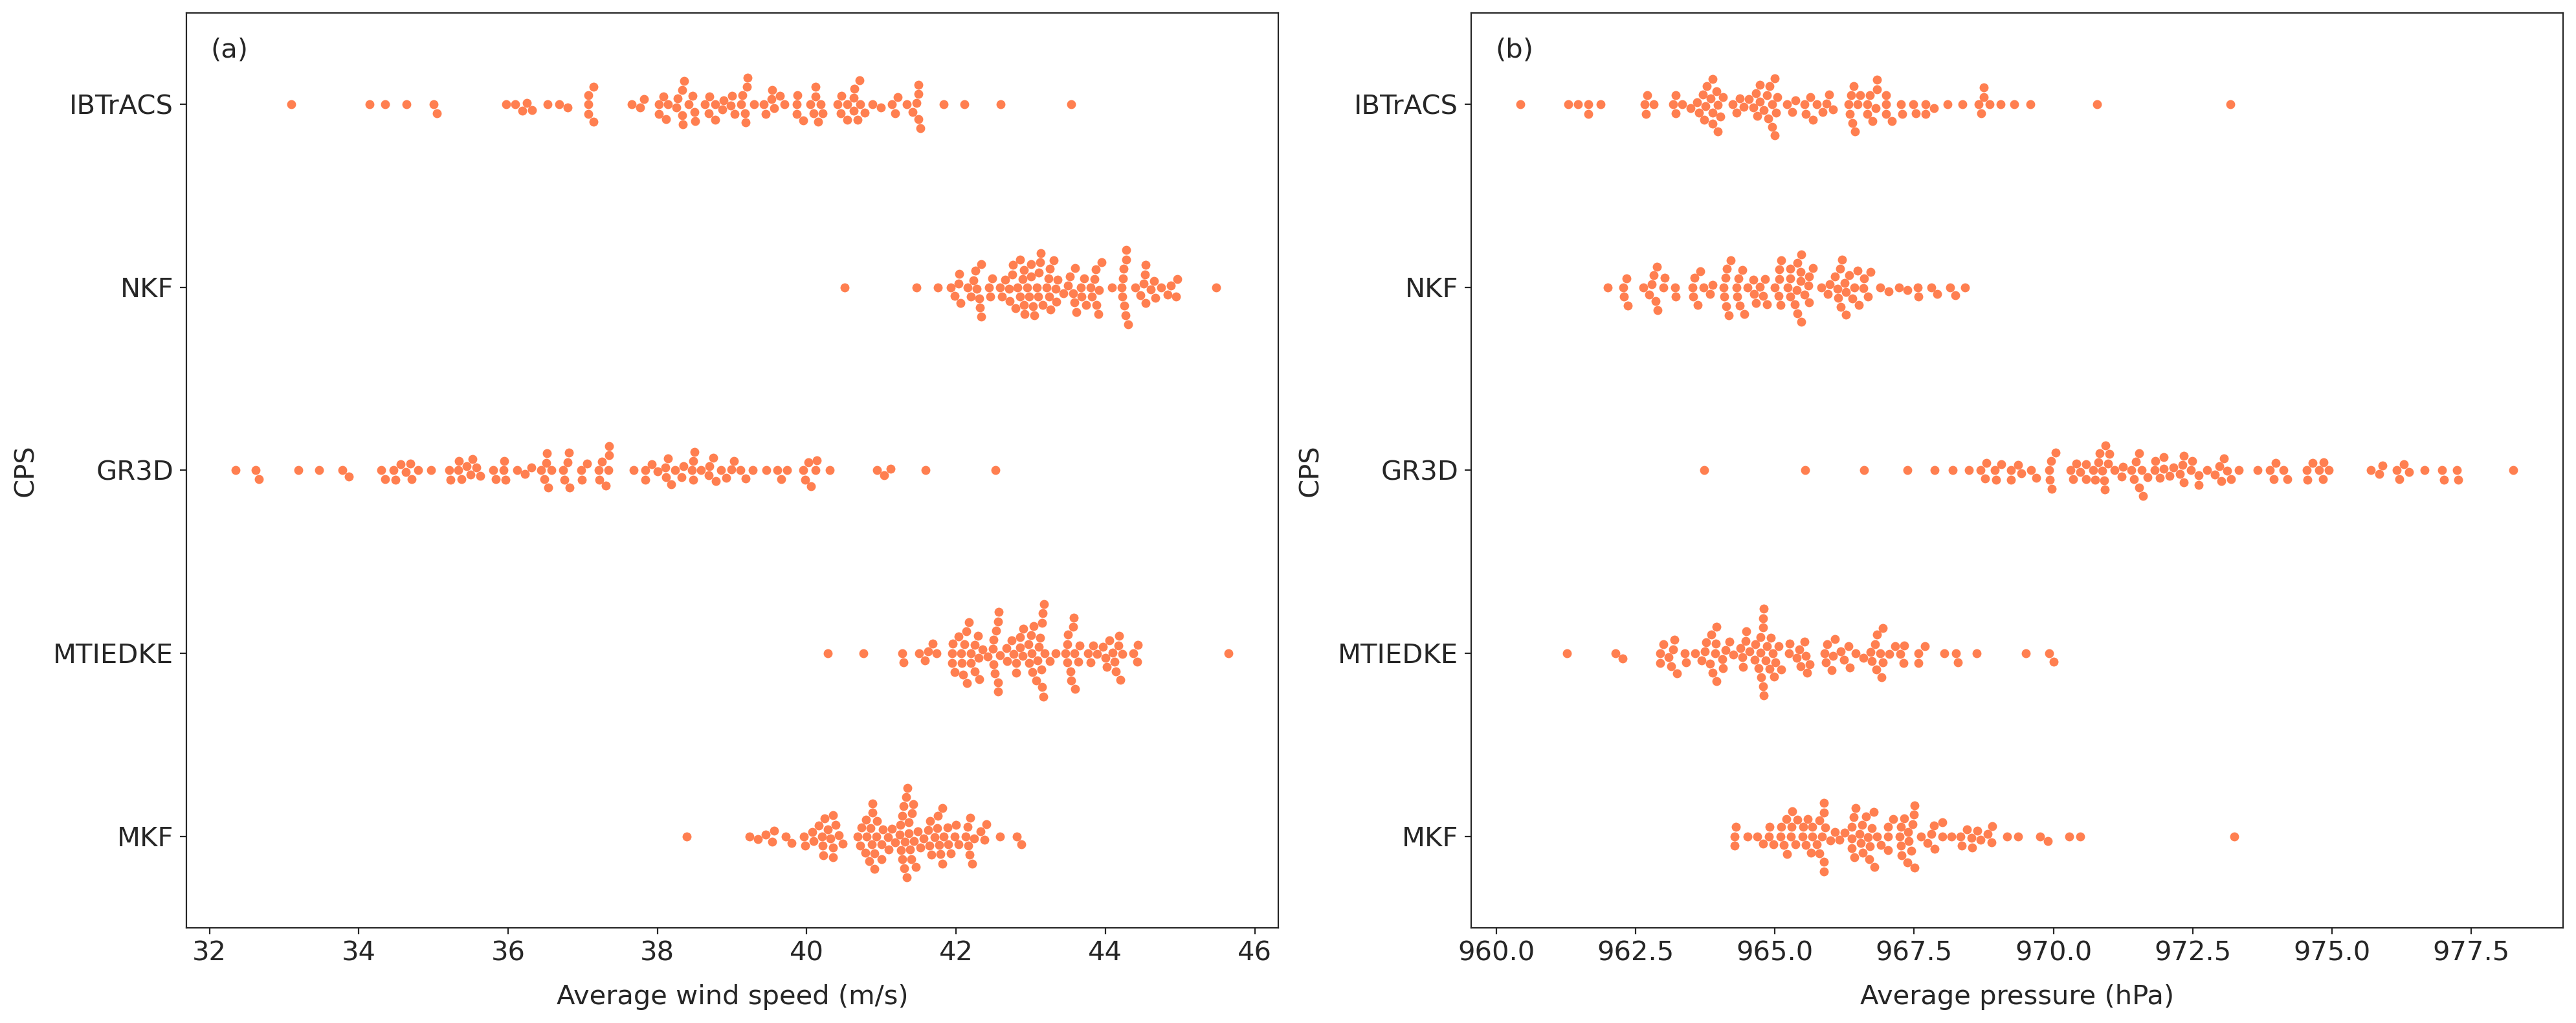

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.offsetbox import AnchoredText

import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))
#plt.rcParams['figure.figsize'] = (10, 5)


#fig, (ax1, ax2) = plt.subplots (1,2, figsize=(20,8), dpi=200)

#define plotting region (2 rows, 2 columns)
#fig, axes = plt.subplots(2, 2)
#create boxplot in each subplot
#sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
#sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])

#set seaborn plotting aesthetics as default #https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
#sns.set()
sns.set_style("white")
#sns.set_style("ticks")

sns.set_style("ticks",{"xtick.major.size":10,"ytick.major.size":10})

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20,8), dpi=200)

#create boxplot in each subplot
#sns.violinplot(data=df, x='team', y='points', ax=axes[0])
#sns.violinplot(data=df, x='team', y='assists', ax=axes[1])



def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) for _ in range(n_boots) ]


#pollution = pd.read_csv('./dataset/pollution_wide.csv')
pollution = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/Swarmplot_4.csv',keep_default_na=True, delimiter=',')
#, header=None,names=['Wind_KF','Pressure_KF'])
'''
cinci_may_NO2 = pollution.query("CPS  ==  'IBTrACS'").Wind

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2);

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False);
'''

pollution_may = pollution.query("Month == 3")
pollution_may

city_boots = pd.DataFrame()

for CPS in ['IBTrACS', 'NKF', 'GR3D', 'MTIEDKE', 'MKF']: #'IBTrACS', 
    # Filter to city
    city_NO2 = pollution_may[pollution_may.CPS  ==  CPS].Wind*0.51444 #Knots to m/s
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'Average wind speed (m/s)': bootstrap(city_NO2, 100), 'CPS': CPS})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "CPS", x = "Average wind speed (m/s)", data = city_boots, color = 'coral', ax=axes[0]);
ax=axes[0].set_ylabel('CPS',fontsize=15, labelpad=8)
ax=axes[0].set_xlabel('Average wind speed (m/s)',fontsize=15, labelpad=10)

#pollution = pd.read_csv('./dataset/pollution_wide.csv')
#pollution = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/Swarmplot_4.csv',keep_default_na=True, delimiter=',')
#, header=None,names=['Wind_KF','Pressure_KF'])
'''
cinci_may_NO2 = pollution.query("CPS  ==  'IBTrACS'").Wind

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2);

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False);
'''

pollution_may = pollution.query("Month == 3")
pollution_may

city_boots = pd.DataFrame()

for CPS in ['IBTrACS', 'NKF', 'GR3D', 'MTIEDKE', 'MKF']: #'IBTrACS',
    # Filter to city
    city_NO2 = pollution_may[pollution_may.CPS  ==  CPS].Pressure
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'Average pressure (hPa)': bootstrap(city_NO2, 100), 'CPS': CPS})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "CPS", x = "Average pressure (hPa)", data = city_boots, color = 'coral', ax=axes[1]);
ax=axes[1].set_ylabel('CPS',fontsize=15, labelpad=8)
ax=axes[1].set_xlabel('Average pressure (hPa)',fontsize=15, labelpad=10)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

wnd = AnchoredText("(a)", loc="upper left", prop=dict(size=15), frameon=False); ax=axes[0].add_artist(wnd)
pre = AnchoredText("(b)", loc="upper left", prop=dict(size=15), frameon=False); ax=axes[1].add_artist(pre)


# Set final fig resources and then save figure.
#plt.set_size_inches(13, 13)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.3)
plt.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_5Wind_Pressure_Swarmplot.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)
plt.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_5Wind_Pressure_Swarmplot.pdf',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)


from sklearn.metrics import *
import numpy as np

EPSILON = 1e-10


#from regressionmetrics.metrics import *
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]


#def WillMottIndexAgreeMent(y_true, y_pred):
"""
Willmott (1981) proposed an index of agreement (d) as a standardized measure of the degree of model prediction error which varies between 0 and 1. 

References : Willmott, C.J., 1981. On the validation of models. Physical geography, 2(2), pp.184-194.

interpretation: Larger is better (Best value is 1.0)
- d = 1, indicates that the model prediction is perfect match.
- d = 0, indicates that no agreement at all

Args:
    y_true ([np.array]): test samples
    y_pred ([np.array]): predicted samples
Returns:
    [float]: Willmott index of agreement
"""
residuals = y_true - y_pred
abs_diff_pred = np.abs(y_pred - np.nanmean(y_true))
abs_diff_obs  = np.abs(y_true  - np.nanmean(y_true))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d= 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
#print("WillMottIndexAgreeMent: ", WillMottIndexAgreeMent(y_true, y_pred))

d
#print("WillMottIndexAgreeMent: ", WillMottIndexAgreeMent(y_true, y_pred))

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ib = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_KF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values


residuals = pres_ib - pres_kf
abs_diff_pred = np.abs(pres_kf - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d = 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

d

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_KF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values


residuals = pres_ib - wind_kf
abs_diff_pred = np.abs(wind_kf - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d = 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

d

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_GR3D_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_GR3D','Pressure_GR3D'])
wind_gr3d = csv_import['Wind_GR3D']*0.51444 #Knots to m/s
wind_gr3d = wind_gr3d.values
#print(wind_kf)
pres_gr3d = csv_import['Pressure_GR3D']
pres_gr3d = pres_gr3d.values


residuals = pres_ib - pres_gr3d
abs_diff_pred = np.abs(pres_gr3d - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d= 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

d

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_GR3D_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_GR3D','Pressure_GR3D'])
wind_gr3d = csv_import['Wind_GR3D']*0.51444 #Knots to m/s
wind_gr3d = wind_gr3d.values
#print(wind_kf)
pres_gr3d = csv_import['Pressure_GR3D']
pres_gr3d = pres_gr3d.values


residuals = pres_ib - wind_gr3d
abs_diff_pred = np.abs(wind_gr3d - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d= 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

d

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MKF','Pressure_MKF'])
wind_mkf = csv_import['Wind_MKF']*0.51444 #Knots to m/s
wind_mkf = wind_mkf.values
#print(wind_kf)
pres_mkf = csv_import['Pressure_MKF']
pres_mkf = pres_mkf.values


residuals = pres_ib - pres_mkf
abs_diff_pred = np.abs(pres_mkf - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d= 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

d

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MKF','Pressure_MKF'])
wind_mkf = csv_import['Wind_MKF']*0.51444 #Knots to m/s
wind_mkf = wind_mkf.values
#print(wind_kf)
pres_mkf = csv_import['Pressure_MKF']
pres_mkf = pres_mkf.values


residuals = pres_ib - wind_mkf
abs_diff_pred = np.abs(wind_mkf - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d= 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

d

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

####### MTIEDKE
csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MTKE_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MT','Pressure_MT'])
wind_mt= csv_import['Wind_MT']*0.51444 #Knots to m/s
wind_mt = wind_mt.values
#print(wind_kf)
pres_mt = csv_import['Pressure_MT']
pres_mt = pres_mt.values



residuals = pres_ib - pres_mt
abs_diff_pred = np.abs(pres_mt - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
d= 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

d

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#https://datagy.io/seaborn-swarmplot/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

####### MTIEDKE
csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MTKE_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MT','Pressure_MT'])
wind_mt= csv_import['Wind_MT']*0.51444 #Knots to m/s
wind_mt = wind_mt.values
#print(wind_kf)
pres_mt = csv_import['Pressure_MT']
pres_mt = pres_mt.values


residuals = pres_ib - wind_mt
abs_diff_pred = np.abs(wind_mt - np.nanmean(pres_ib))
abs_diff_obs  = np.abs(pres_ib  - np.nanmean(pres_ib))
#return 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)
dmt = 1 - np.nansum(residuals**2) / np.nansum((abs_diff_pred * abs_diff_obs)**2)

dmt

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#https://datagy.io/seaborn-swarmplot/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
o = pres_ib.values

####### MTIEDKE
csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MTKE_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MT','Pressure_MT'])
wind_mt= csv_import['Wind_MT']*0.51444 #Knots to m/s
wind_mt = wind_mt.values
#print(wind_kf)
pres_mt = csv_import['Pressure_MT']
s = pres_mt.values

def filter_nan(s,o):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(s*o))>=1:
        data = np.array([s.flatten(),o.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        s = data[:,0]
        o = data[:,1]
    return s, o

#def index_agreement(s, o):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated
    o: observed
output:
    ia: index of agreement
"""
s,o = filter_nan(s,o)
ia = 1 -(np.sum((o-s)**2))/(np.sum(
            (np.abs(s-np.mean(o))+np.abs(o-np.mean(o)))**2))
 #   return ia
ia